# Quick Guide to the Code

This Jupyter Notebook is a guide to most commom and useful functions in the project and how to use them.

More information about the physics and implementation of the code can be found in [Future Paper](https://)

In [1]:
#Importing Libraries
from Plots import *
import matplotlib.pyplot as plt
import time 

# 0. Solar Neutrinos Precession

The solver for the Solar neutrinos scenario is called *solar_solver* and it is implemented in the file [`ODE_Solar.py`](ODE_Solar.py). Its input and output are the following:

* **Input**: 
    - Neutrino Energy [MeV], 
    - Initial Radius [$R_\odot$]
    - Final Radius [$R_\odot$]

* **Output**: 
    - Neutrino $\vec{P}$ Polarization Vector Array [3 Components][Radius Bins], 
    - Hamiltonian $\vec{B}$ Polarization Vector Array [3 Components][Radius Bins]
    - Radius Array [$R_\odot$]

In [6]:
from ODE_Solar import solver_solar

E_high=30 #Mev
E_low=0.1 #Mev
r_i,r_f =0,1 #R_solar

P_high,B_high,r_per_R_sol=solver_solar(E_high,r_i,r_f)
P_low,B_low,r_per_R_sol=solver_solar(E_low,r_i,r_f)

### Probability Plots

Here we plot the survival and conversion probability of the neutrino as a function of the propagated radius. We also compare it to the expected analytical averaged probabilities.

For **high energy** neutrinos:

$$
\left < P^{High}_{\nu_e \rightarrow \nu_e} \right > \approx \frac{1}{2} - \frac{1}{2} \cos{2\theta}= \sin^2{\theta}
$$

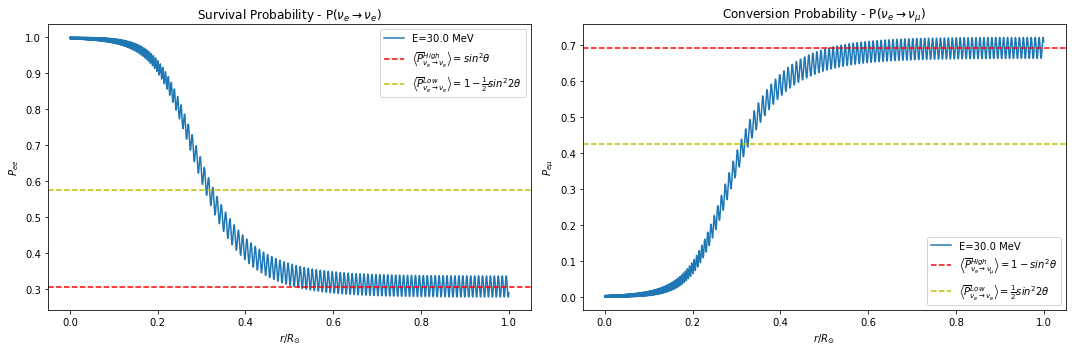

In [4]:
Plot_Probability_Solar(P_high[2],r_per_R_sol,E_high)

In [5]:
ani=Pol_Vec_Anim_Solar(P_high,B_high,r_per_R_sol,E_high)
HTML(ani.to_html5_video())

For **low energy** neutrinos:

$$
\left < P^{Low}_{\nu_e \rightarrow \nu_e} \right > \approx 1 - \frac{1}{2} \sin^2{2\theta}
$$

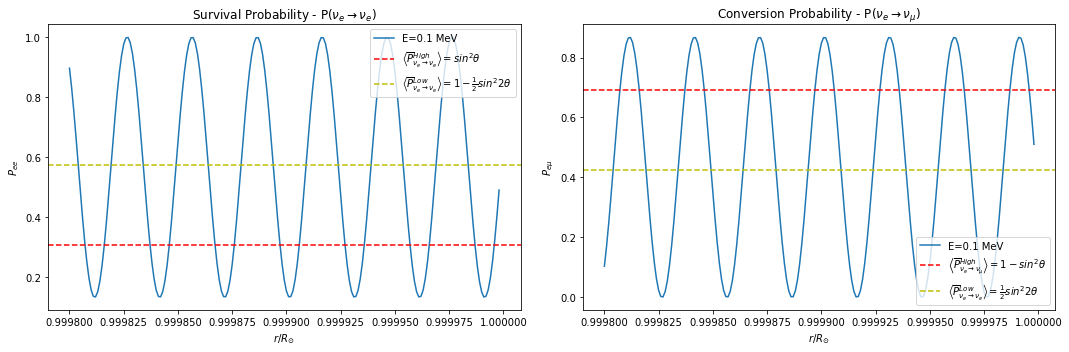

In [11]:
Plot_Probability_Solar(P_low[2][-200:-1],r_per_R_sol[-200:-1],E_low)

In [13]:
ani=Pol_Vec_Anim_Solar(P_low,B_low,r_per_R_sol[0:400],E_low)
HTML(ani.to_html5_video())

# 1. Isotropic and Monoenergetic Neutrino Gas

# 2. Istropic Neutrino Gas with Spectral Distribution

# Draft
# Collective Effects - Bipolar Isotropic Gas with Spectrum

In [2]:
#Importing Libraries
#from ODE_Functions import *
from ODE_Isotropic_Spectrum import *
from Plots import *

import matplotlib.pyplot as plt
import time    
from IPython.display import HTML

In [3]:
nu_types=['nu_e','nu_x']
t_bins=7000
r_i,r_f=0,200 #km
E_i,E_f=1,50
E_step=1

#Initial spectrum
E_0=[10,15,24,24] #Mean energy in MeV
Amplitude=[1,1*10/15,1*10/24,1*10/24]

In [4]:
mass_ord="NH"
start_time = time.time()
E_vec,r_vec,nu_e_time_NH,nubar_e_time_NH, nu_x_time_NH,nubar_x_time_NH,nu_NH,nubar_NH=solver_two_families(nu_types,r_i,r_f,E_i,E_f,E_step,E_0,Amplitude,mass_ord)
print("Took %s minutes" % ((time.time() - start_time)/60))

Took 2.837318472067515 minutes


In [5]:
mass_ord="IH"
start_time = time.time()
E_vec,r_vec,nu_e_time_IH,nubar_e_time_IH, nu_x_time_IH,nubar_x_time_IH,nu_IH,nubar_IH=solver_two_families(nu_types,r_i,r_f,E_i,E_f,E_step,E_0,Amplitude,mass_ord)
print("Took %s minutes" % ((time.time() - start_time)/60))

Took 2.978858435153961 minutes


# Plots

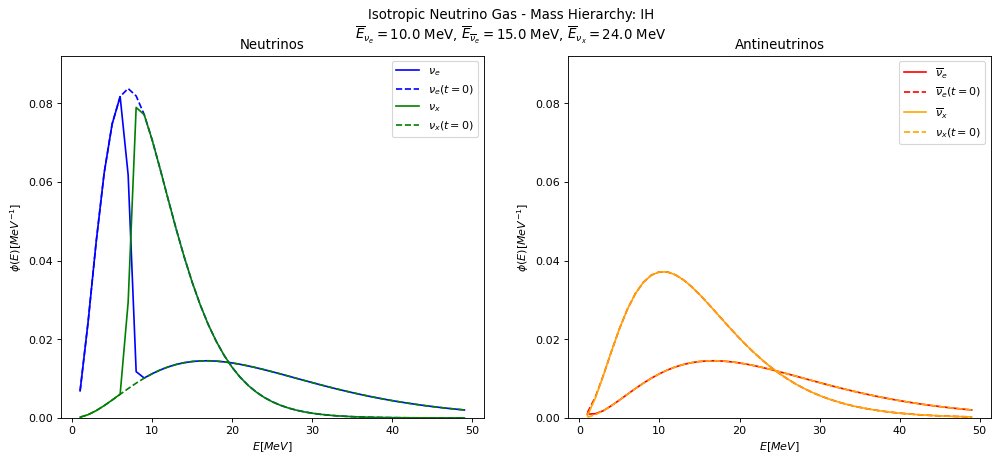

In [6]:
Plot_Spectrum(E_vec,E_0,nu_e_time_IH,nubar_e_time_IH, nu_x_time_IH,nubar_x_time_IH,"IH")

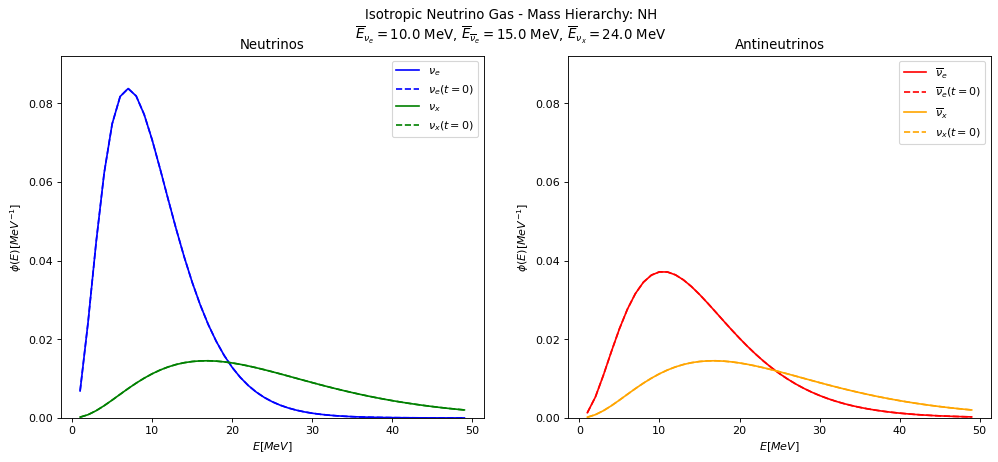

In [7]:
Plot_Spectrum(E_vec,E_0,nu_e_time_NH,nubar_e_time_NH, nu_x_time_NH,nubar_x_time_NH,"NH")

# Animations

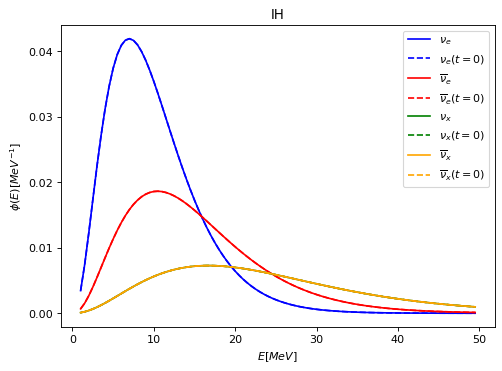

In [15]:
anim_IH=animation_2_families_spectrum(E_vec,t_vec,nu_e_time_IH,nubar_e_time_IH, nu_x_time_IH,nubar_x_time_IH,"IH")
HTML(anim_IH.to_html5_video())

In [10]:
# Save final Spectra
#NH
np.save("Output/Final_Spectrum_configuration_1_nu_e_NH.npy",nu_e_time_NH[-1])
np.save("Output/Final_Spectrum_configuration_1_nubar_e_NH.npy",nubar_e_time_NH[-1])
np.save("Output/Final_Spectrum_configuration_1_nu_x_NH.npy",nu_x_time_NH[-1])
np.save("Output/Final_Spectrum_configuration_1_nubar_x_NH.npy",nubar_x_time_NH[-1])
#IH
np.save("Output/Final_Spectrum_configuration_1_nu_e_IH.npy",nu_e_time_IH[-1])
np.save("Output/Final_Spectrum_configuration_1_nubar_e_IH.npy",nubar_e_time_IH[-1])
np.save("Output/Final_Spectrum_configuration_1_nu_x_IH.npy",nu_x_time_IH[-1])
np.save("Output/Final_Spectrum_configuration_1_nubar_x_IH.npy",nubar_x_time_IH[-1])